# Project on the application of time series model

Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller

from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [19]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [20]:
df['DATE'].dtypes

dtype('int64')

In [21]:
df['DATE'] = pd.to_datetime(df['DATE'], unit='s')
df['DATE'].tail()

41261   2017-08-31 19:56:00
41262   2017-08-31 19:57:00
41263   2017-08-31 19:58:00
41264   2017-08-31 19:59:00
41265   2017-08-31 20:00:00
Name: DATE, dtype: datetime64[ns]

In [22]:
df.index = df['DATE']
df.drop('DATE',axis = 1,inplace=True)
df.tail()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-08-31 19:56:00,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,45.130,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
2017-08-31 19:57:00,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,45.130,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
2017-08-31 19:58:00,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,45.135,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
2017-08-31 19:59:00,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,45.065,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
2017-08-31 20:00:00,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,45.120,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


## This forecasting is for ADP

In [23]:
df_ADP = df[['NASDAQ.ADP']].copy()
df_ADP.tail()

,NASDAQ.ADP
DATE,
2017-08-31 19:56:00,106.565
2017-08-31 19:57:00,106.590
2017-08-31 19:58:00,106.520
2017-08-31 19:59:00,106.400
2017-08-31 20:00:00,106.470


In [24]:
df_ADP.count()

NASDAQ.ADP    41266
dtype: int64

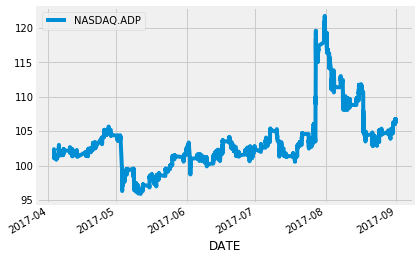

In [25]:
df_ADP.plot()

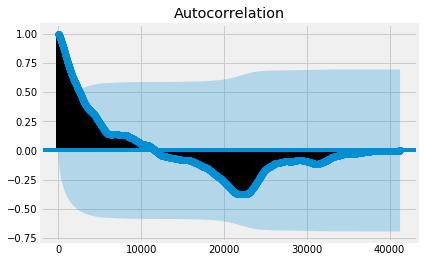

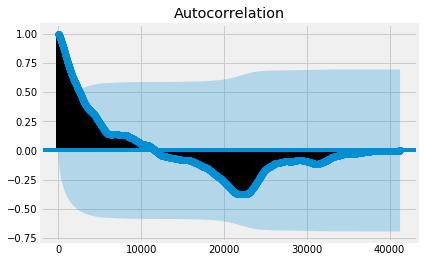

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_ADP)

## Converting series to stationary

In [27]:
df_ADP.shift(1)

,NASDAQ.ADP
DATE,
2017-04-03 13:30:00,NaN
2017-04-03 13:31:00,102.2300
2017-04-03 13:32:00,102.1400
2017-04-03 13:33:00,102.2125
2017-04-03 13:34:00,102.1400
2017-04-03 13:35:00,102.0600
2017-04-03 13:36:00,102.0400
2017-04-03 13:37:00,102.3300
2017-04-03 13:38:00,102.3700


In [28]:
X = df_ADP.values
train = X[0:28886] # 27 data as train data
test = X[28886:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28886
12380


## ARIMA model¶

In [29]:
import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 124317.93290534396
(0, 0, 1) 85271.48908067102
(0, 1, 0) -80762.52187440007
(0, 1, 1) -81075.63405539673
(0, 1, 2) -81074.17286811543
(0, 1, 3) -81090.00715673812
(0, 1, 4) -81093.98472065358
(0, 1, 5) -81101.87576670734
(0, 2, 0) -63874.98955883524
(0, 2, 1) -80619.27427166035
(0, 2, 2) -80936.04628440547
(1, 0, 0) -80762.97956294319
(1, 0, 1) -81077.32276400918
(1, 0, 2) -81075.79811007748
(1, 0, 3) -81091.26459737812
(1, 0, 4) -81095.05246453552
(1, 0, 5) -81102.70785576594
(1, 1, 0) -81067.89180999978
(1, 1, 1) -81073.99649149516
(1, 1, 2) -81099.2410569784
(1, 1, 3) -81095.99043051641
(1, 2, 0) -70003.48847377124
(1, 2, 1) -80988.20233128469
(1, 2, 2) -81013.44330660296
(1, 2, 4) -81035.1779130033
(1, 2, 5) -81031.54411233151
(2, 0, 0) -81069.70670013371
(2, 0, 1) -81075.64369770736
(2, 0, 2) -81098.79328218938
(2, 0, 3) -81096.91027920542
(2, 1, 0) -81077.86550535473
(2, 1, 1) -81094.92273711729
(2, 1, 2) -81099.54378045905
(2, 1, 3) -81102.23796792676
(2, 2, 0) -72749.

In [ ]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(4,1,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

In [ ]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)